<a href="https://colab.research.google.com/github/surajsrivathsa/applied_statistics/blob/main/Imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [ ]:
churn_master_df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv')
churn_df = churn_master_df.copy()

In [ ]:
churn_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [ ]:
churn_df.describe()

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7016.000000
mean,0.162147,32.371149,5.446259,64.761692,2282.589168
std,0.368612,24.559481,1.964916,30.090047,2265.506114
min,0.000000,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,4.000000,35.500000,401.925000
50%,0.000000,29.000000,6.000000,70.350000,1397.100000
75%,0.000000,55.000000,7.000000,89.850000,3792.325000
max,1.000000,72.000000,9.000000,118.750000,8684.800000


In [ ]:
churn_df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
tenure               0
ServiceCount         0
Contract             0
PaperlessBilling     0
MonthlyCharges       0
TotalCharges        27
Churn                0
dtype: int64

We can see from below that Total charges are normally null for tenure = 0. This is because for customers starting first time their total would not be accumulated. Also see that corelation between churn column and total charges all null rows have churn = No. While imputing you consider corelation of these columns

In [ ]:
churn_df.isna().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [ ]:
churn_df[churn_df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
431,7781-HVGMK,Female,0,72,7,Two year,Yes,65.20,NaN,No
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No
1261,4741-WWJQZ,Female,0,2,4,Month-to-month,Yes,80.15,NaN,No
1287,8800-ZKRFW,Female,0,30,8,Month-to-month,Yes,107.50,NaN,No
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No
1487,5035-PGZXH,Female,0,56,7,One year,Yes,106.80,NaN,No
1846,7369-TRPFD,Male,0,19,7,One year,No,18.80,NaN,No


As we can see all customers with tenure = 0 is null


*   For gradient boosted model or any model that could resist outliers we can impute some high value
*   Model sensitive to outliers should be imputed properly after bringing to range



In [ ]:
churn_df[churn_df["tenure"] == 0]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No
3331,7644-OMVMY,Male,0,0,7,Two year,No,19.85,NaN,No
3826,3213-VVOLG,Male,0,0,8,Two year,No,25.35,NaN,No
4380,2520-SGTTA,Female,0,0,7,Two year,No,20.00,NaN,No
5218,2923-ARZLG,Male,0,0,7,One year,Yes,19.70,NaN,No
6670,4075-WKNIU,Female,0,0,7,Two year,No,73.35,NaN,No


Mean is 2282 and median is 1397, but there are customers with really high and really low values. 

In [ ]:
churn_df["TotalCharges"].describe()

count    7016.000000
mean     2282.589168
std      2265.506114
min        18.800000
25%       401.925000
50%      1397.100000
75%      3792.325000
max      8684.800000
Name: TotalCharges, dtype: float64

It doesn't seem to be a normal distribution as max value is skewed. Maybe right skewed gaussian. Also for churn=yes there are lot of outliers

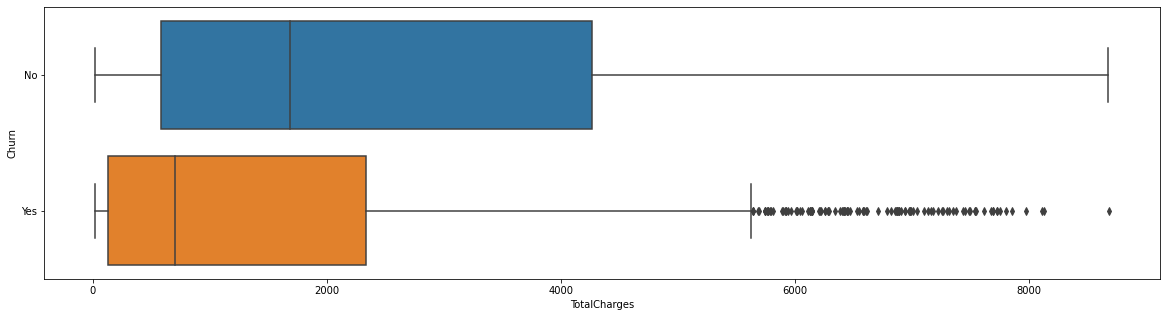

In [ ]:
plt.figure(figsize=(20, 5))
sns.boxplot(x="TotalCharges", y="Churn", data=churn_df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


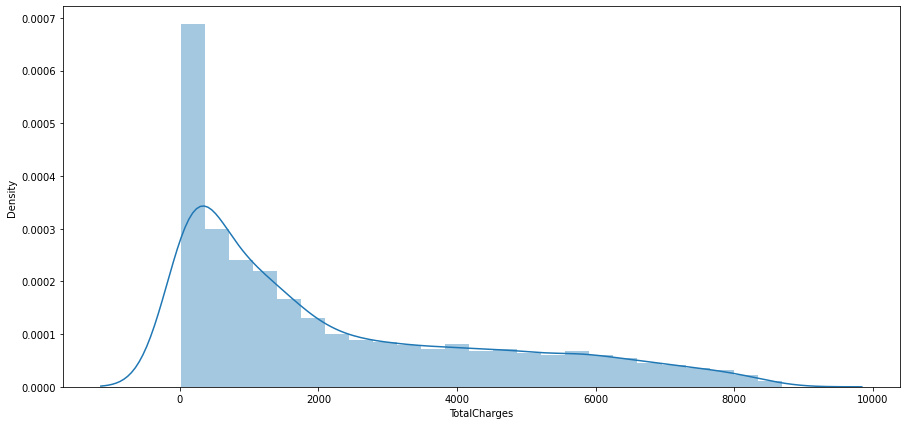

In [ ]:
plt.figure(figsize=(15, 7))
sns.distplot(a=churn_df["TotalCharges"], hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


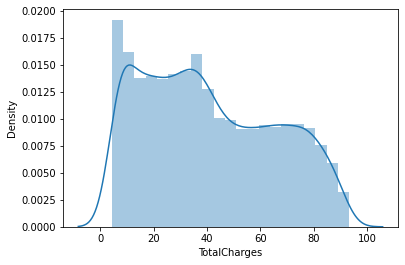

In [ ]:
sns.distplot(a=churn_df["TotalCharges"].apply(np.sqrt), hist=True)

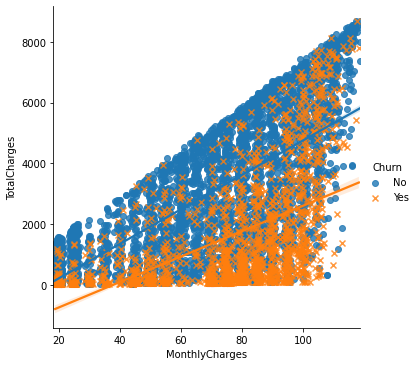

In [ ]:

sns.lmplot(x="MonthlyCharges", y="TotalCharges", data=churn_df, hue="Churn", fit_reg=True, markers=["o", "x"])

Looks like there is weak relation ship for churn = NO, If we fit a straight line then standard error would be huge

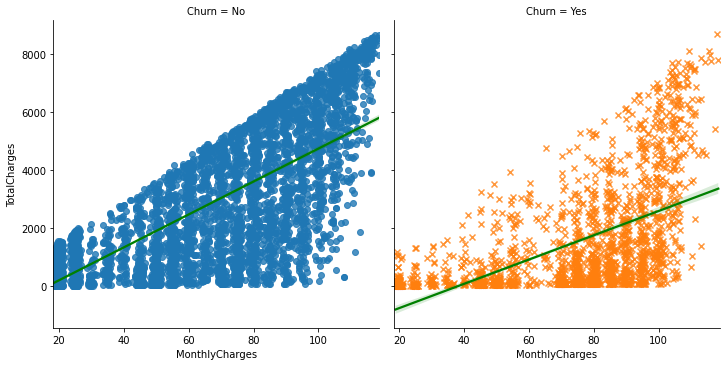

In [ ]:
sns.lmplot(x="MonthlyCharges", y="TotalCharges", data=churn_df, hue="Churn", col="Churn", fit_reg=True, markers=["o", "x"], line_kws={"color": "green"})

Some positive weak corelation that could not be ignored (>0.5)

In [ ]:
churn_df[["TotalCharges", "MonthlyCharges"]].corr()

,TotalCharges,MonthlyCharges
TotalCharges,1.000000,0.650964
MonthlyCharges,0.650964,1.000000


Even better for chrn = No than entire dataset

In [ ]:
churn_df[churn_df["Churn"]=="No"][["TotalCharges", "MonthlyCharges"]].corr()

,TotalCharges,MonthlyCharges
TotalCharges,1.00000,0.75739
MonthlyCharges,0.75739,1.00000


Now create a separate dataframe that has churn=No and have no missing Total charge value. We will train a simple model like regression for data that has no missing TotalCharge and predict TotalCharge. This model would then be used to impute records for churn=No and missing TotalCharge

In [ ]:
churn_no_df = churn_df[(churn_df["Churn"]=="No") & (churn_df["TotalCharges"].isna()==False)]

In [ ]:
churn_no_df.describe()

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
count,5147.000000,5147.000000,5147.000000,5147.000000,5147.000000
mean,0.128619,37.649310,5.807655,61.301700,2555.220264
std,0.334810,24.064882,1.891621,31.077612,2328.034938
min,0.000000,1.000000,1.000000,18.250000,18.800000
25%,0.000000,15.000000,4.000000,25.100000,579.200000
50%,0.000000,38.000000,6.000000,64.450000,1685.900000
75%,0.000000,61.000000,7.000000,88.425000,4263.725000
max,1.000000,72.000000,9.000000,118.750000,8672.450000


Find linear regression for monthly charge(independent var) vs total charge(dependent that has to be predicted)

In [ ]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(churn_no_df["MonthlyCharges"], churn_no_df["TotalCharges"])

In [ ]:
print("slope, intercept, r_value, p_value, std_err, r_squared: {}, {}, {}, {}, {}, {}".format(slope, intercept, r_value, p_value, std_err, r_value**2 ))

slope, intercept, r_value, p_value, std_err, r_squared: 56.73637552696062, -922.8160085118097, 0.7573902887184033, 0.0, 0.6819261867835148, 0.5736400494449463


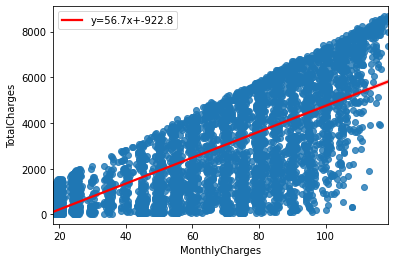

In [ ]:
ax = sns.regplot(x="MonthlyCharges", y="TotalCharges", data=churn_no_df, line_kws = {"color": "red", "label": "y={0:.1f}x+{1:.1f}".format(slope, intercept)})
ax.legend(loc="best")

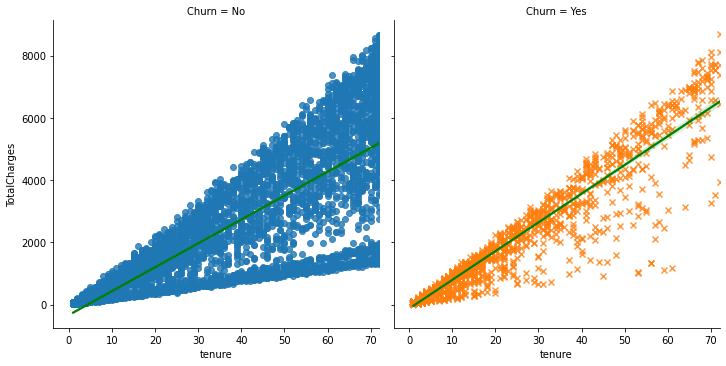

In [ ]:
sns.lmplot(x="tenure", y="TotalCharges", data=churn_df, hue="Churn", col="Churn", fit_reg=True, markers=["o", "x"], line_kws={"color": "green"})

0.79 is better corelation than Monthly charge, lets see if this decreases standard error

In [ ]:
churn_df[churn_df["Churn"]=="No"][["tenure", "TotalCharges"]].corr()

,tenure,TotalCharges
tenure,1.000000,0.793288
TotalCharges,0.793288,1.000000


In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(churn_no_df["tenure"], churn_no_df["TotalCharges"])

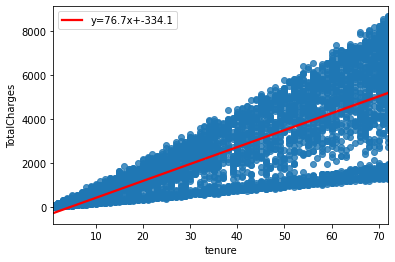

In [ ]:
ax = sns.regplot(x="tenure", y="TotalCharges", data=churn_no_df, line_kws = {"color": "red", "label": "y={0:.1f}x+{1:.1f}".format(slope, intercept)})
ax.legend(loc="best")

seems like tenure is marginally worse than monthly charges, Lets combine tenure and monthly charges it may give more corelation and less error

In [ ]:
churn_no_df["tenure_MonthlyCharges"] = churn_no_df["tenure"] * churn_no_df["MonthlyCharges"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
churn_no_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,tenure_MonthlyCharges
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No,29.85
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No,1936.30
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No,1903.50
6,1452-KIOVK,Male,0,22,5,Month-to-month,Yes,89.10,1949.40,No,1960.20
7,6713-OKOMC,Female,0,10,2,Month-to-month,No,29.75,301.90,No,297.50


We can see that there is a perfect fit almost with correlation near to one

In [ ]:
churn_no_df[churn_df["Churn"]=="No"][["tenure_MonthlyCharges", "TotalCharges"]].corr()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,tenure_MonthlyCharges,TotalCharges
tenure_MonthlyCharges,1.000000,0.999535
TotalCharges,0.999535,1.000000


In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(churn_no_df["tenure_MonthlyCharges"], churn_no_df["TotalCharges"])

We can see that error is almost close to zero, r value is close to one and pvalue is close to zero, this is a good model

In [ ]:
print("slope, intercept, r_value, p_value, std_err, r_squared: {}, {}, {}, {}, {}, {}".format(slope, intercept, r_value, p_value, std_err, r_value**2 ))

slope, intercept, r_value, p_value, std_err, r_squared: 1.0001720821518205, -0.3010983695039613, 0.9995350350972924, 0.0, 0.00042536192429779864, 0.9990702863869455


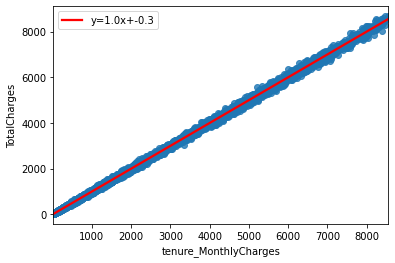

In [ ]:
ax = sns.regplot(x="tenure_MonthlyCharges", y = "TotalCharges", data=churn_no_df, line_kws = {"color": "red", "label": "y={0:.1f}x+{1:.1f}".format(slope, intercept)})
ax.legend(loc="best")

function to impute missing totalcharge values

if tenure is zero then the tenant or customer is new hence his first monthly charge is his total charge

else use regression slope intercept with both tenure and monthly charge and predict total charge

In [ ]:
def fillna(tenure, monthlycharges):
  if (tenure == 0):
    totalcharges = monthlycharges
  else:
    totalcharges = tenure*monthlycharges
    totalcharges = intercept + (slope * totalcharges)
  return round(totalcharges, 2)


Get the rows for whom the totalcharge is null and apply the fillna function only to them

In [ ]:
churn_df["totalChargeNew"] = churn_df.apply(lambda x:x["TotalCharges"] if not pd.isna(x["TotalCharges"]) else fillna(x["tenure"], x["MonthlyCharges"]), axis=1  )

In [ ]:
churn_df[churn_df["TotalCharges"].isna() == True].head(10)

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,totalChargeNew
431,7781-HVGMK,Female,0,72,7,Two year,Yes,65.20,NaN,No,4694.91
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No,52.55
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No,20.25
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No,80.85
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No,25.75
1261,4741-WWJQZ,Female,0,2,4,Month-to-month,Yes,80.15,NaN,No,160.03
1287,8800-ZKRFW,Female,0,30,8,Month-to-month,Yes,107.50,NaN,No,3225.25
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No,56.05
1487,5035-PGZXH,Female,0,56,7,One year,Yes,106.80,NaN,No,5981.53
1846,7369-TRPFD,Male,0,19,7,One year,No,18.80,NaN,No,356.96
